* 주어진 데이터로 keras, pytorch 모델 만들어보기 https://archive.ics.uci.edu/dataset/111/zoo
* x: 2번(hair)부터 17번(catsize)까지 / y: 18번
* 요구사항
1. 데이터 분석 & 시각화
2. 데이터 증식 (동일한 데이터를 복사하는 방식)
* 현재 약 100건이니 5배(약 500)로 만들어주세요.
1. 데이터를 7:3의 비율로 나누기
2. random_state = 1122 로 설정
3. 1번 열 삭제(animal name)
4. 18번 열(y) 원핫인코딩
5. keras, pytorch 각각 1개의 모델을 모두 만들어보기

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
zoo = fetch_ucirepo(id=111)

# data (as pandas dataframes)
X = zoo.data.features
y = zoo.data.targets

# metadata
print(zoo.metadata)

# variable information
print(zoo.variables)

{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 'inst

In [106]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [107]:
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [108]:
import pandas as pd
import numpy as np

In [109]:
data = pd.concat([X, y], axis=1)
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [110]:
lst = []
for _, row in data.iterrows():
    for _ in range(5):
        new_row = row.copy()
        lst.append(new_row)

expanded = pd.DataFrame(lst).reset_index(drop = True)
expanded

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
501,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
502,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
503,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [111]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(expanded , test_size=0.3, random_state=1122)

In [112]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [113]:
y_train_one = pd.get_dummies(y_train,columns=['type'],prefix = 'type')
y_test_one = pd.get_dummies(y_test,columns=['type'],prefix = 'type')

In [114]:
y_train_one

,type_1,type_2,type_3,type_4,type_5,type_6,type_7
16,1,0,0,0,0,0,0
126,0,0,0,0,1,0,0
241,1,0,0,0,0,0,0
361,0,0,0,0,0,0,1
222,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
408,0,0,0,0,0,0,1
267,0,0,0,0,0,0,1
457,0,0,1,0,0,0,0
237,1,0,0,0,0,0,0


In [115]:
y_test_one

,type_1,type_2,type_3,type_4,type_5,type_6,type_7
76,0,0,0,0,0,0,1
406,0,0,0,0,0,0,1
104,0,1,0,0,0,0,0
113,1,0,0,0,0,0,0
350,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
390,0,1,0,0,0,0,0
441,0,0,0,0,0,1,0
502,0,1,0,0,0,0,0
190,0,0,0,1,0,0,0


# Keras

In [13]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [116]:
# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=16))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.fit(X_train, y_train_one, epochs=50, batch_size=8, validation_data=(X_test, y_test_one))

Epoch 1/50
45/45 [==============================] - 2s 12ms/step - loss: 0.1625 - mae: 0.2824 - val_loss: 0.1355 - val_mae: 0.2459
Epoch 2/50
45/45 [==============================] - 0s 7ms/step - loss: 0.1305 - mae: 0.2497 - val_loss: 0.1273 - val_mae: 0.2442
Epoch 3/50
45/45 [==============================] - 0s 7ms/step - loss: 0.1259 - mae: 0.2477 - val_loss: 0.1249 - val_mae: 0.2367
Epoch 4/50
45/45 [==============================] - 0s 7ms/step - loss: 0.1242 - mae: 0.2444 - val_loss: 0.1238 - val_mae: 0.2405
Epoch 5/50
45/45 [==============================] - 0s 7ms/step - loss: 0.1235 - mae: 0.2438 - val_loss: 0.1234 - val_mae: 0.2414
Epoch 6/50
45/45 [==============================] - 0s 8ms/step - loss: 0.1232 - mae: 0.2445 - val_loss: 0.1232 - val_mae: 0.2420
Epoch 7/50
45/45 [==============================] - 0s 6ms/step - loss: 0.1230 - mae: 0.2445 - val_loss: 0.1230 - val_mae: 0.2438
Epoch 8/50
45/45 [==============================] - 0s 9ms/step - loss: 0.1228 - mae: 0.2

In [44]:
hist = model.fit(X_train, y_train_one, epochs=50, batch_size=8, validation_data=(X_test, y_test_one), verbose=0)

In [45]:
print(model.evaluate(X_test, y_test_one))

5/5 [==============================] - 0s 4ms/step - loss: 0.1225 - mae: 0.2446
[0.1224592849612236, 0.24464955925941467]


In [46]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [47]:
# 코랩 한글깨짐방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [19]:
# 코랩 한글깨짐방지
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=10)
plt.rc('font', family='NanumGothic')

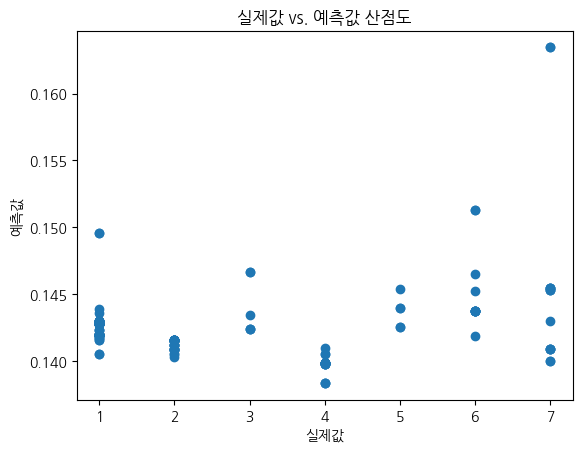

In [48]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs. 예측값 산점도')
plt.show()

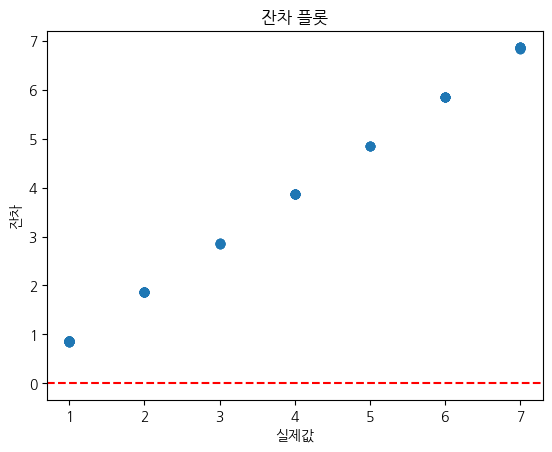

In [49]:
residuals = y_test - y_pred.flatten()

plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('실제값')
plt.ylabel('잔차')
plt.title('잔차 플롯')
plt.show()

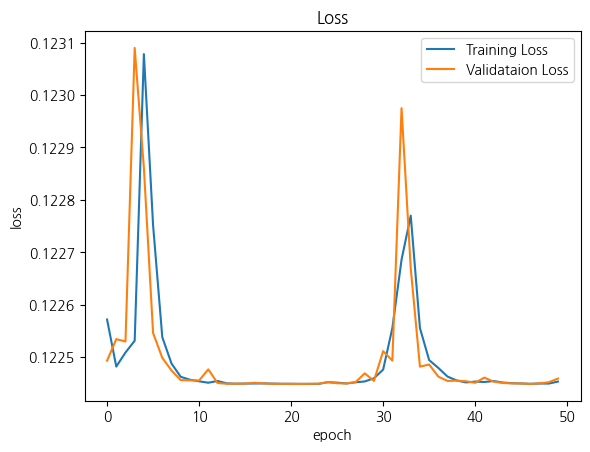

In [50]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validataion Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()
plt.show()

In [27]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=16))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(1, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


353/353 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.4079 - val_loss: 0.0000e+00 - val_accuracy: 0.4013
Epoch 2/200
353/353 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.4079 - val_loss: 0.0000e+00 - val_accuracy: 0.4013
Epoch 3/200
353/353 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4079 - val_loss: 0.0000e+00 - val_accuracy: 0.4013
Epoch 4/200
353/353 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.4079 - val_loss: 0.0000e+00 - val_accuracy: 0.4013
Epoch 5/200
353/353 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4079 - val_loss: 0.0000e+00 - val_accuracy: 0.4013
Epoch 6/200
353/353 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4079 - val_loss: 0.0000e+00 - val_accuracy: 0.4013
Epoch 7/200
353/353 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4079 -

# Pytorch

In [150]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import random

In [138]:
x_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)

x_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

In [145]:
class MultiLinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(MultiLinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

In [147]:
model = MultiLinearRegressionModel(x_train_tensor.shape[1])
optimizer = optim.SGD(model.parameters(), lr=1e-5)

In [155]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f'epoch [{epoch + 1}/{num_epochs}], training loss: {loss.item():.4f}')

epoch [1/50], training loss: 11.8126
epoch [2/50], training loss: 11.8117
epoch [3/50], training loss: 11.8108
epoch [4/50], training loss: 11.8099
epoch [5/50], training loss: 11.8091
epoch [6/50], training loss: 11.8082
epoch [7/50], training loss: 11.8073
epoch [8/50], training loss: 11.8064
epoch [9/50], training loss: 11.8056
epoch [10/50], training loss: 11.8047
epoch [11/50], training loss: 11.8038
epoch [12/50], training loss: 11.8029
epoch [13/50], training loss: 11.8021
epoch [14/50], training loss: 11.8012
epoch [15/50], training loss: 11.8003
epoch [16/50], training loss: 11.7994
epoch [17/50], training loss: 11.7986
epoch [18/50], training loss: 11.7977
epoch [19/50], training loss: 11.7968
epoch [20/50], training loss: 11.7959
epoch [21/50], training loss: 11.7951
epoch [22/50], training loss: 11.7942
epoch [23/50], training loss: 11.7933
epoch [24/50], training loss: 11.7924
epoch [25/50], training loss: 11.7916
epoch [26/50], training loss: 11.7907
epoch [27/50], traini

In [156]:
model.eval()
with torch.no_grad():
    final_outputs = model(x_test_tensor)
    final_loss = criterion(final_outputs, y_test_tensor)

print(f'최종 테스트 손실: {final_loss.item():.4f}')

최종 테스트 손실: 12.1929
